<a href="https://colab.research.google.com/github/BiszakAletta/FAKT.ML.kurzus/blob/main/masodikora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#bináris beteg vagy sem

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

In [4]:
dataframe = pd.read_csv(file_url)

In [6]:
dataframe.shape

(303, 14)

In [7]:
dataframe.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca        thal  target
0     63    1   1       145   233  ...      2.3      3   0       fixed       0
1     67    1   4       160   286  ...      1.5      2   3      normal       1
2     67    1   4       120   229  ...      2.6      2   2  reversible       0
3     37    1   3       130   250  ...      3.5      3   0      normal       0
4     41    0   2       130   204  ...      1.4      1   0      normal       0
..   ...  ...  ..       ...   ...  ...      ...    ...  ..         ...     ...
298   52    1   1       118   186  ...      0.0      2   0       fixed       0
299   43    0   4       132   341  ...      3.0      2   0  reversible       1
300   65    1   4       135   254  ...      2.8      2   1  reversible       1
301   48    1   4       130   256  ...      0.0      1   2  reversible       1
302   63    0   4       150   407  ...      4.0      2   3  reversible       1

[303 rows x 14 column

In [9]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#true 1 false 0
#szum 1-ek összege - hiányzó adatok soronként

In [13]:
labeler = LabelEncoder()

In [14]:
labeler.fit(dataframe.thal)
#adat betanulása és alakítása

LabelEncoder()

In [16]:
dataframe.thal = labeler.transform(dataframe.thal)

In [17]:
#dataframe.thal = labeler.fit_transform(...)

In [18]:
dataframe.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   1       145   233    1  ...      0      2.3      3   0     2       0
1     67    1   4       160   286    0  ...      1      1.5      2   3     3       1
2     67    1   4       120   229    0  ...      1      2.6      2   2     4       0
3     37    1   3       130   250    0  ...      0      3.5      3   0     3       0
4     41    0   2       130   204    0  ...      0      1.4      1   0     3       0
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   52    1   1       118   186    0  ...      0      0.0      2   0     2       0
299   43    0   4       132   341    1  ...      1      3.0      2   0     4       1
300   65    1   4       135   254    0  ...      0      2.8      2   1     4       1
301   48    1   4       130   256    1  ...      1      0.0      1   2     4       1
302   63    0   4       150   407  

In [19]:
y_df = dataframe.target

In [20]:
y_df.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [24]:
x_df = dataframe.copy().drop('target',axis = 1) #oszloponként törlés

In [25]:
x_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle = True) #Adatbázisok kettéosztása

In [29]:
x_train.shape

(272, 13)

In [30]:
x_test.shape[0] == y_test.shape[0] #ugyananyi teszt mint eredmény

True

In [32]:
#normalizálás
#tilos egyben normalizálni! átlag szórás együtt lenne számolva - kap belőle infót
normalizer = StandardScaler()


In [36]:
normalizer.fit(x_train)

StandardScaler()

In [37]:
x_train = normalizer.transform(x_train)

In [38]:
x_train

array([[-0.91029248,  0.67419986, -1.12567806, ..., -0.92751204,
        -0.72086501,  1.08354013],
       [ 0.51837783,  0.67419986,  0.86253254, ..., -0.92751204,
        -0.72086501, -0.50955671],
       [-0.3608039 , -1.4832397 ,  0.86253254, ...,  0.70012199,
        -0.72086501,  1.08354013],
       ...,
       [-0.03111075,  0.67419986, -1.12567806, ..., -0.92751204,
         0.34476153,  1.08354013],
       [ 0.51837783,  0.67419986,  0.86253254, ...,  0.70012199,
        -0.72086501,  1.08354013],
       [ 0.95796869,  0.67419986,  0.86253254, ...,  0.70012199,
         0.34476153,  1.08354013]])

In [39]:
x_test = normalizer.transform(x_test)

In [40]:
#train átlagával normalizáljuk a test részt is
#fit adatok betöltése utána tesre ezen nem változtatunk


In [41]:
#Architektúra létrehozása


In [42]:
#soronként rétegek definiál - egymásba fűzés

In [60]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [57]:
input = Input(shape=(x_train.shape[1]))
x = Dense(32, activation='relu')(input)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
#dense csak előre halad az információ, minden mindennel össze van kötve
#mennyi neuron kettő hatvány
#bemenet

In [58]:
model = keras.Model(input, output)

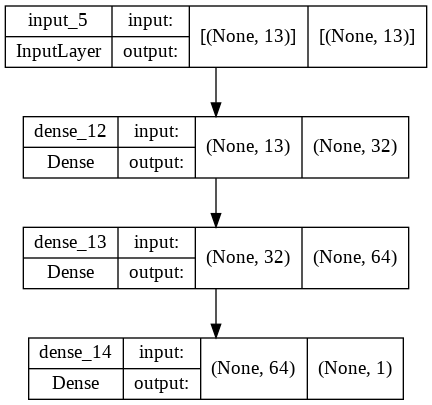

In [59]:
plot_model(model, show_shapes= True)

In [62]:
model.compile(loss='binary_crossentropy', metrics=[BinaryAccuracy()]) 

In [63]:
model.fit(x=x_train, y= y_train, epochs = 50)

Epoch 1/50
9/9 [==============================] - 2s 5ms/step - loss: 0.6014 - binary_accuracy: 0.7206
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5071 - binary_accuracy: 0.8346
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4535 - binary_accuracy: 0.8456
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4165 - binary_accuracy: 0.8382
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3884 - binary_accuracy: 0.8419
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3668 - binary_accuracy: 0.8529
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3491 - binary_accuracy: 0.8566
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3362 - binary_accuracy: 0.8640
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3284 - binary_accuracy: 0.8676
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.

In [64]:
model.predict(x_test)

array([[3.6113942e-01],
       [4.0745201e-07],
       [9.8416686e-01],
       [8.5436606e-01],
       [2.2237811e-05],
       [3.3671945e-02],
       [6.0576570e-01],
       [1.7133564e-02],
       [1.3318062e-03],
       [8.0103874e-03],
       [2.4347901e-02],
       [7.6163709e-03],
       [4.5235157e-03],
       [5.6098646e-01],
       [1.2629479e-02],
       [4.8682722e-01],
       [6.7416622e-05],
       [6.2679350e-03],
       [1.9173354e-02],
       [9.8362565e-03],
       [7.7859932e-01],
       [8.6246729e-01],
       [6.4063489e-01],
       [1.8369257e-03],
       [4.1202009e-03],
       [1.0147014e-01],
       [2.5029242e-02],
       [6.8642585e-05],
       [8.3530116e-01],
       [5.5370033e-03],
       [5.7020783e-04]], dtype=float32)

In [65]:
model.evaluate(x=x_test,y = y_test)

1/1 [==============================] - 0s 255ms/step - loss: 0.2387 - binary_accuracy: 0.8710


[0.23866188526153564, 0.8709677457809448]

In [ ]:
#epoch összes elemét látta a modellnek